In [78]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

In [79]:
img = cv2.imread("./cat.jpg" , cv2.IMREAD_GRAYSCALE)

In [80]:
img

array([[ 5,  5,  5, ..., 18, 17, 16],
       [ 5,  5,  5, ..., 19, 18, 17],
       [ 5,  5,  5, ..., 20, 19, 19],
       ...,
       [97, 97, 97, ..., 56, 53, 52],
       [94, 95, 94, ..., 55, 52, 51],
       [93, 93, 93, ..., 56, 53, 51]], dtype=uint8)

In [81]:
highestColor = max(img.flatten())
lowestColor = min(img.flatten())

print(highestColor , lowestColor)

177 0


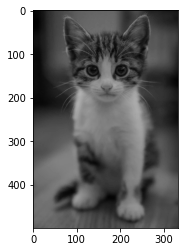

In [82]:
def show_image(image : np.ndarray):
    plt.imshow(image , cmap='gray', vmin=0, vmax=255)
    plt.show()

show_image(img)

In [83]:
# average
def get_image_average(image : np.ndarray):
    average = np.average(image)
    return average

In [84]:
# ecart type
def get_standard_deviation(image : np.ndarray):
    return np.std(image)

get_standard_deviation(img)

36.964974601795944

In [85]:
def get_histogram(image : np.ndarray):
    histogram = []
    flattened_image = image.flatten()
    for i in range(0,256):
        histogram.append(np.count_nonzero(flattened_image == i))
    return np.array(histogram)

In [86]:
histogram = get_histogram(img)

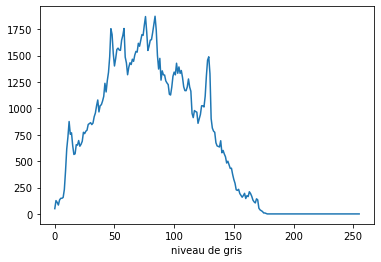

In [87]:
def draw_histogram(histogram):
    plt.plot(range(256), histogram)
    plt.xlabel('niveau de gris')
    plt.show()
    
draw_histogram(histogram)

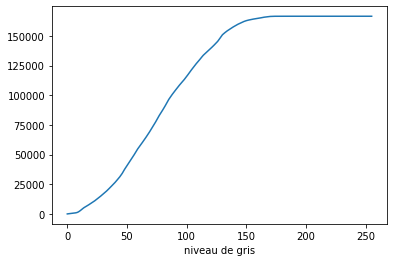

In [88]:
def get_accumulated_histogram(image : np.array):
    histogram = get_histogram(image)
    accumulated_histogram = np.add.accumulate(histogram)
    return accumulated_histogram

draw_histogram(get_accumulated_histogram(img))

In [89]:
np.shape(img)

(500, 333)

In [90]:
######## TP2
def get_proba_accumulated(image : np.ndarray):
    h = get_accumulated_histogram(image)
    return h / (np.shape(image)[0] * np.shape(image)[1])

In [91]:
get_proba_accumulated(img)

array([3.00300300e-04, 1.05705706e-03, 1.71171171e-03, 2.21621622e-03,
       3.00900901e-03, 3.89789790e-03, 4.78678679e-03, 5.72372372e-03,
       7.11111111e-03, 9.54954955e-03, 1.32372372e-02, 1.76096096e-02,
       2.28648649e-02, 2.73933934e-02, 3.20060060e-02, 3.58918919e-02,
       3.92732733e-02, 4.26906907e-02, 4.66306306e-02, 5.05405405e-02,
       5.47147147e-02, 5.85645646e-02, 6.25225225e-02, 6.66546547e-02,
       7.12972973e-02, 7.58618619e-02, 8.05645646e-02, 8.53273273e-02,
       9.04144144e-02, 9.55495495e-02, 1.00738739e-01, 1.05819820e-01,
       1.10984985e-01, 1.16510511e-01, 1.22246246e-01, 1.28396396e-01,
       1.34876877e-01, 1.40678679e-01, 1.46834835e-01, 1.53045045e-01,
       1.59459459e-01, 1.66144144e-01, 1.73573574e-01, 1.80510511e-01,
       1.88096096e-01, 1.96150150e-01, 2.05087087e-01, 2.15621622e-01,
       2.25825826e-01, 2.34942943e-01, 2.43357357e-01, 2.52192192e-01,
       2.61543544e-01, 2.70972973e-01, 2.80294294e-01, 2.89597598e-01,
      

In [92]:
def get_A(image : np.ndarray):
    p = get_proba_accumulated(image)
    return p * 255

In [93]:
A = get_A(img)
n1 = A.astype("uint8")
print(n1)

[  0   0   0   0   0   0   1   1   1   2   3   4   5   6   8   9  10  10
  11  12  13  14  15  16  18  19  20  21  23  24  25  26  28  29  31  32
  34  35  37  39  40  42  44  46  47  50  52  54  57  59  62  64  66  69
  71  73  76  78  81  83  86  88  90  92  94  96  99 101 103 106 108 110
 113 116 118 121 124 126 129 131 134 136 139 142 145 147 149 152 154 156
 158 160 162 164 166 168 169 171 173 175 177 179 181 183 185 187 189 191
 193 195 197 199 201 202 204 206 207 209 210 212 213 214 216 217 219 220
 222 224 226 229 231 232 233 234 236 237 238 239 240 241 242 242 243 244
 245 246 246 247 248 248 249 249 250 250 250 251 251 251 251 252 252 252
 252 253 253 253 253 254 254 254 254 254 254 254 254 254 254 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 25

In [94]:
#### TP 3

In [95]:
def rand_helper(i):
    a = random.randint(0,20)
    if a == 20  : return 255
    elif a == 0 : return 0
    else : return i

def add_noise(image : np.ndarray) -> np.ndarray:
    flat_noisy_image =  np.array([rand_helper(i) for i in image.flatten()])
    return flat_noisy_image.reshape(image.shape)

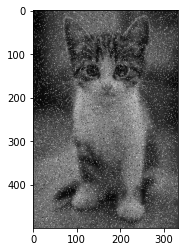

In [96]:
noisy_image = add_noise(img)
show_image(noisy_image)

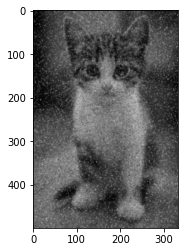

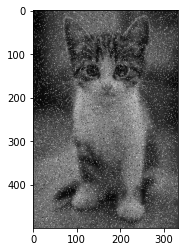

In [120]:
def mean_filter(image : np.ndarray):
    filtered = image.copy()
    w = 1
    for i in range(w,image.shape[0]-w):
        for j in range(w,image.shape[1]-w):
            block = image[i-w:i+w+1, j-w:j+w+1]
            mean_result = np.mean(block,dtype=np.float32)
            filtered[i][j] = int(mean_result)
    return filtered

n = mean_filter(noisy_image)
show_image(n)
show_image(noisy_image)

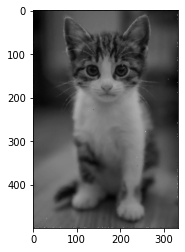

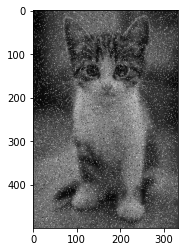

In [122]:
def median_filter(image : np.ndarray):
    filtered = image.copy()
    w = 1
    for i in range(w,image.shape[0]-w):
        for j in range(w,image.shape[1]-w):
            block : np.ndarray = image[i-w:i+w+1, j-w:j+w+1]
            flat_sorted_block = np.sort(block.flatten())
            median_value = flat_sorted_block[4]
            filtered[i][j] = int(median_value)
    return filtered

n = median_filter(noisy_image)
show_image(n)
show_image(noisy_image)

In [127]:
# measure median difference between images
def calc_noise_signal_ratio(image : np.ndarray , noisy_image : np.ndarray) -> float :
    average_value_image = get_image_average(image)
    s = np.sum(np.power((image - average_value_image) , 2))
    b = np.sum(np.power(noisy_image - image , 2))
    return  np.sqrt(s/b)

2.271825395244556